# RDD 

## Reference

- https://arxiv.org/pdf/1911.09511.pdf
- https://www.econometrics-with-r.org/13-4-quasi-experiments.html - Simulation
- https://cattaneo.princeton.edu/papers/Cattaneo-Titiunik-VazquezBare_2020_Sage.pdf

- https://andrewpwheeler.com/2021/11/24/regression-discontinuity-designs/ - Simulation
- https://towardsdatascience.com/the-crown-jewel-of-causal-inference-regression-discontinuity-design-rdd-bad37a68e786 - Simulation 
- Simulate an RDD. Use the sin function for W when creating Y
- Prediction of Y(0), Y(1)
  - Random Forest
  - NN
  - Right side - RF, Left side - NN
- Mean difference E(Y_1_hat) - E(Y_0_hat)


In [1]:
## Modules

import matplotlib.pyplot as plt, numpy as np, pandas as pd, statsmodels.api as sm, statsmodels.formula.api as smf

## Data

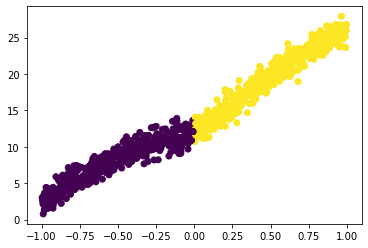

In [161]:
## Data simulation
# Simulating data
from random import random


np.random.seed(10)
normal = np.random.normal()
n_c = 3000 # total number of cases
# pretend this is predicted prob
# x = np.random.beta(3,10,size=n_cases)
# pretend this is med costs over a year

x = np.random.uniform(-1, 1, size = n_c)


# y = 3 + 2 * x + 10 * np.sin(x>=0) + np.random.normal(size = n_c)
# y = 1 + 2 * (x > 0) * np.random.normal(size = n_c) - 4 * (x < 0) * np.random.normal(size = n_c)
y = 4 * x + 12 * np.sin(x * (x > 0)) + 12 * np.cos(x * (x < 0)) + np.random.normal(size = n_c)
# y = 3 + 2 * W + 10 * (W>=0) + rnorm(1000)
# y = x + np.random.uniform(size = n_c)
w = np.where(x < 0, 0, 1)
plt.scatter(x, y, c = w)



In [165]:
df = pd.DataFrame({"y": y, "x": x, "w": w})
df.head

,y,x,w
0,12.703282,-0.002986,0
1,7.965516,-0.550407,0
2,7.679433,-0.603874,0
3,18.532823,0.521061,1
4,7.277587,-0.661778,0


In [206]:
df.sort_values("x", ascending=True, inplace = True)
df_treat = df[df.w == 1]
df_ctrol = df[df.w == 0]

## Methods

### Random Forest

In [199]:

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)


In [207]:
df_treat["rf_yhat"] = rf.fit(df_treat[['x']], df_treat['y']).predict(df_treat[["x"]])
df_ctrol["rf_yhat"] = rf.fit(df_ctrol[['x']], df_ctrol['y']).predict(df_ctrol[["x"]])

tau_rf = np.mean(df_treat["rf_yhat"]) - np.mean(df_ctrol["rf_yhat"])
print(tau)

11.573060159767042


C:\Users\Jhon\AppData\Local\Temp\ipykernel_11028\2607429894.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_treat["rf_yhat"] = rf.fit(df_treat[['x']], df_treat['y']).predict(df_treat[["x"]])
C:\Users\Jhon\AppData\Local\Temp\ipykernel_11028\2607429894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ctrol["rf_yhat"] = rf.fit(df_ctrol[['x']], df_ctrol['y']).predict(df_ctrol[["x"]])


11.573060159767042


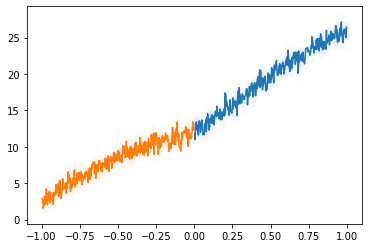

In [211]:
for i in df_treat, df_ctrol:
    plt.plot("x", "rf_yhat", data = i)
    plt.scatter("x", "y", data = i, alpha = .01)
print(tau)

11.557510729066173


C:\Users\Jhon\AppData\Local\Temp\ipykernel_11028\1787979016.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_treat["lr_yhat"] = LinearRegression().fit(df_treat[['x']], df_treat['y']).predict(df_treat[["x"]])
C:\Users\Jhon\AppData\Local\Temp\ipykernel_11028\1787979016.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ctrol["lr_yhat"] = LinearRegression().fit(df_ctrol[['x']], df_ctrol['y']).predict(df_ctrol[["x"]])


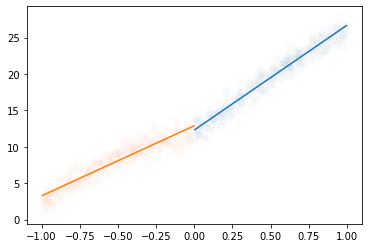

In [225]:
# from cmath import tau
from sklearn.linear_model import LinearRegression 

df_treat["lr_yhat"] = LinearRegression().fit(df_treat[['x']], df_treat['y']).predict(df_treat[["x"]])
df_ctrol["lr_yhat"] = LinearRegression().fit(df_ctrol[['x']], df_ctrol['y']).predict(df_ctrol[["x"]])

tau_lr = np.mean(df_treat["lr_yhat"]) - np.mean(df_ctrol["lr_yhat"])
print(tau_lr)

for i in df_treat, df_ctrol:
    plt.plot("x", "lr_yhat", data = i)
    plt.scatter("x", "y", data = i, alpha = .01)

In [223]:
df_treat["lr_yhat"]

441    12.355845
722    12.363793
728    12.382404
426    12.408475
902    12.435379
         ...    
323    26.558874
868    26.586890
682    26.610342
699    26.640000
795    26.656158
Name: lr_yhat, Length: 496, dtype: float64

In [228]:
import tensorflow as tf
from tensorflow import keras
# from tensorflow.keras import layers


TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [227]:
nn =  tf.keras.Sequential([
    df_treat[["x"]],
    layers.Dense(units=1)
])

NameError: name 'tf' is not defined

## Compare